In [1]:
import numpy as np
import ipdb # for debugging
from matplotlib import pyplot as plt
from matplotlib import patches


In [2]:
def j1(x1, x2):
    s1 = np.sin(x1[2])
    c1 = np.cos(x1[2])

    return np.arrray([[1, 0, -x2[0] * s1 - x2[1] * c1], [0, 1, x2[0] * c1 - x2[1] * s1], [0, 0, 1]])

def j2(x1, x2):
    s1 = np.sin(x1[2])
    c1 = np.cos(x1[2])

    return np.array([[c1, -s1, 0], [s1, c1, 0], [0, 0, 1]])

def jab(tab):
    if len(tab) != 3:
        raise Exception('tab is not a transformation')
    s = np.sin(tab[2])
    c = np.cos(tab[2])
    return np.array([[c, -s, tab[1]], [s, c, -tab[0]], [0, 0, 1]])

In [3]:
def tinv(tab):
    tba = np.zeros(tab.shape)
    for t in range(0, tab.shape[0]):
        tab[t:t+3] = tinv1(tab[t:t+3])
    return tba

def tinv1(tab):
    s = np.sin(tab[2])[0]
    c = np.cos(tab[2])[0]
    tba = np.array([[-tab(0)*c - tab(1)*s]
          [[tab(0)*s - tab(1)*c]]
          [-tab (2)]])
    return tba

In [4]:
def angle_wrap(a):
    if a > np.pi:
        return a-2*np.pi
    elif a < -np.pi:
        return a + 2*np.pi
    else:
        return a


In [5]:
def tcomp(tab, tbc):
    if len(tab) != 3:
        raise Exception('tab is not a transformation')

    if len(tbc) != 3:
        raise Exception('tab is not a transformation')

    ang = tab[2] + tbc[2]

    ang = angle_wrap(ang)

    s = np.sin(tab[2])[0]
    c = np.cos(tab[2])[0]
    
    xy = tab[:2] + np.matmul(np.array([[c, -s], [s, c]]),tbc[:2])
    tac = np.array([xy[0], xy[1], ang])
    
    return tac

In [6]:
def plot_ellipse(x, P, nSigma):
    eH = []
    P = P[0:2, 0:2]
    x = x[0:2]
    if (not any(np.diag(P) == 0)):
        D, V = np.linalg.eig(P)
        y = nSigma*np.array([[np.cos(np.arange(0,2*pi, 0.1))] [np.sin(np.arange(0,2*pi, 0.1))]]);
        axes = V*np.sqrt(D)
        el = axes*y
        el = [el, el[:, 0]]
        el = el+np.tile(x, [1, el.shape(1)])
        eH = plt.plot(el[0, :], el[1, :]);
        return eH

In [7]:
def draw_robot(Xr, col):
    p = 0.02
    a = np.array([-2, 10, -2, 10])
    l1 = (a[1] - a[0]) * p
    l2 = (a[3] - a[2]) * p
    P = np.array([[-1, 1, 0, -1], [-1, -1, 3, -1]])
    theta = Xr[2] - np.pi/2
    c = np.cos(theta)[0]
    s = np.sin(theta)[0]
    rot_mat = np.array([[c, -s], [s, c]])
    P = np.matmul(rot_mat, P)
    P[0] = P[0] * l1 + Xr[0]
    P[1] = P[1] * l2 + Xr[1]
    plt.plot(P[0,:],P[1,:], col, linewidth=0.1);
    plt.plot(Xr[0], Xr[1], '+' + col);
    

In [18]:
def circle_path(color, fig):
    nSteps = 16
    t = np.array([[2], [0]])
    ang = -np.pi/2
    pose_inc_straight_line = np.array([[2], [0], [0]])
    pose_inc_straight_line_and_rotation = np.array([[2],[0],[ang]])
    pose = np.array([[0],[0],[np.pi/2]])

    fig.suptitle('Pose compositions', fontsize=16)


    draw_robot(pose, color)

    for k in range(1, nSteps):
        if np.mod(k, 4) == 0:
            pose = tcomp(pose, pose_inc_straight_line_and_rotation)
        else:
            pose = tcomp(pose, pose_inc_straight_line);
        draw_robot(pose,color);

    

In [20]:
def get_noise(sigma):
    noise_x = np.random.normal(0, sigma[0], size=1)
    noise_y = np.random.normal(0, sigma[1], size=1)
    noise_t = np.random.normal(0, sigma[2]*(np.pi/2), size=1)
    return np.array([[noise_x], [noise_y], [noise_t]])

In [21]:
def circle_path_noisy(sigma, color, fig):
    nSteps = 16
    t = np.array([[2], [0]])
    ang = -np.pi/2
    pose_inc_straight_line = np.array([[2], [0], [0]])
    pose_inc_straight_line_and_rotation = np.array([[2],[0],[ang]])
    pose = np.array([[0],[0],[np.pi/2]])
    fig.suptitle('Pose compositions', fontsize=16)

    noise = get_noise(sigma)
    
    draw_robot(pose, color)

    for k in range(1, nSteps):        
        if np.mod(k, 4) == 0:
            n_p = noise + pose_inc_straight_line_and_rotation
        else:
            n_p = noise + pose_inc_straight_line
        pose = tcomp(pose, n_p)
        
        draw_robot(pose,color);
    

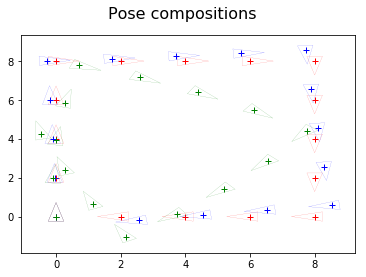

In [34]:
fig = plt.figure(0)
circle_path('r', fig)
circle_path_noisy([0.04, 0.04, 0.01],'b', fig)
circle_path_noisy([0.1, 0.1, 0.05],'g', fig)

En la anterior imagen, podemos ver cómo el ruido afecta al movimineto del robot. Para ello, mostramos tres casos: ruido nulo (rojo), ruido leve (azul), ruido elevado (verde).